In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('../data/cleaned_reddit.csv')
df.head()

,author,created_utc,id,is_original_content,target,selftext
0,ChubbyMonkeyX,1539241532,9n7o85,False,1,really bad but not very endangering ive though...
1,yognzvaidkd,1620336450,n6i6sp,False,1,a lot just happened and idk whats true can som...
2,kiranode,1554270592,b8u505,False,0,first group therapy session still stressed out...
3,b50142,1560436373,c06jok,False,0,participants needed support workers healthcare...
4,AccountForMyOCD,1558730325,bsly2g,False,1,just as i thought i was doing better i encount...


In [3]:

# Create a new column that is the length of the selftext
df['selftext_length'] = df['selftext'].str.len()

# Create a new column that is the number of words in the selftext
df['selftext_word_count'] = df['selftext'].str.split().str.len()


# Create a new column that is the number of sentences in the selftext
df['selftext_sentence_count'] = df['selftext'].str.split('.').str.len()

# A column for each letter of the alphabet that is the number of times that letter appears in the selftext
for letter in 'abcdefghijklmnopqrstuvwxyz':
    df[f'{letter}'] = df['selftext'].str.count(letter)

In [4]:
df.head()

,author,created_utc,id,is_original_content,target,selftext,selftext_length,selftext_word_count,selftext_sentence_count,a,...,q,r,s,t,u,v,w,x,y,z
0,ChubbyMonkeyX,1539241532,9n7o85,False,1,really bad but not very endangering ive though...,1575,289,1,117,...,1,63,92,120,29,26,17,7,39,1
1,yognzvaidkd,1620336450,n6i6sp,False,1,a lot just happened and idk whats true can som...,1010,206,1,64,...,0,41,45,64,23,7,21,3,19,1
2,kiranode,1554270592,b8u505,False,0,first group therapy session still stressed out...,1511,291,1,93,...,1,66,88,109,41,10,24,2,33,0
3,b50142,1560436373,c06jok,False,0,participants needed support workers healthcare...,1574,226,1,107,...,5,100,105,106,47,21,15,2,29,2
4,AccountForMyOCD,1558730325,bsly2g,False,1,just as i thought i was doing better i encount...,810,164,1,61,...,0,24,34,65,18,5,17,4,22,0


ValueError: num must be 1 <= num <= 25, not 26

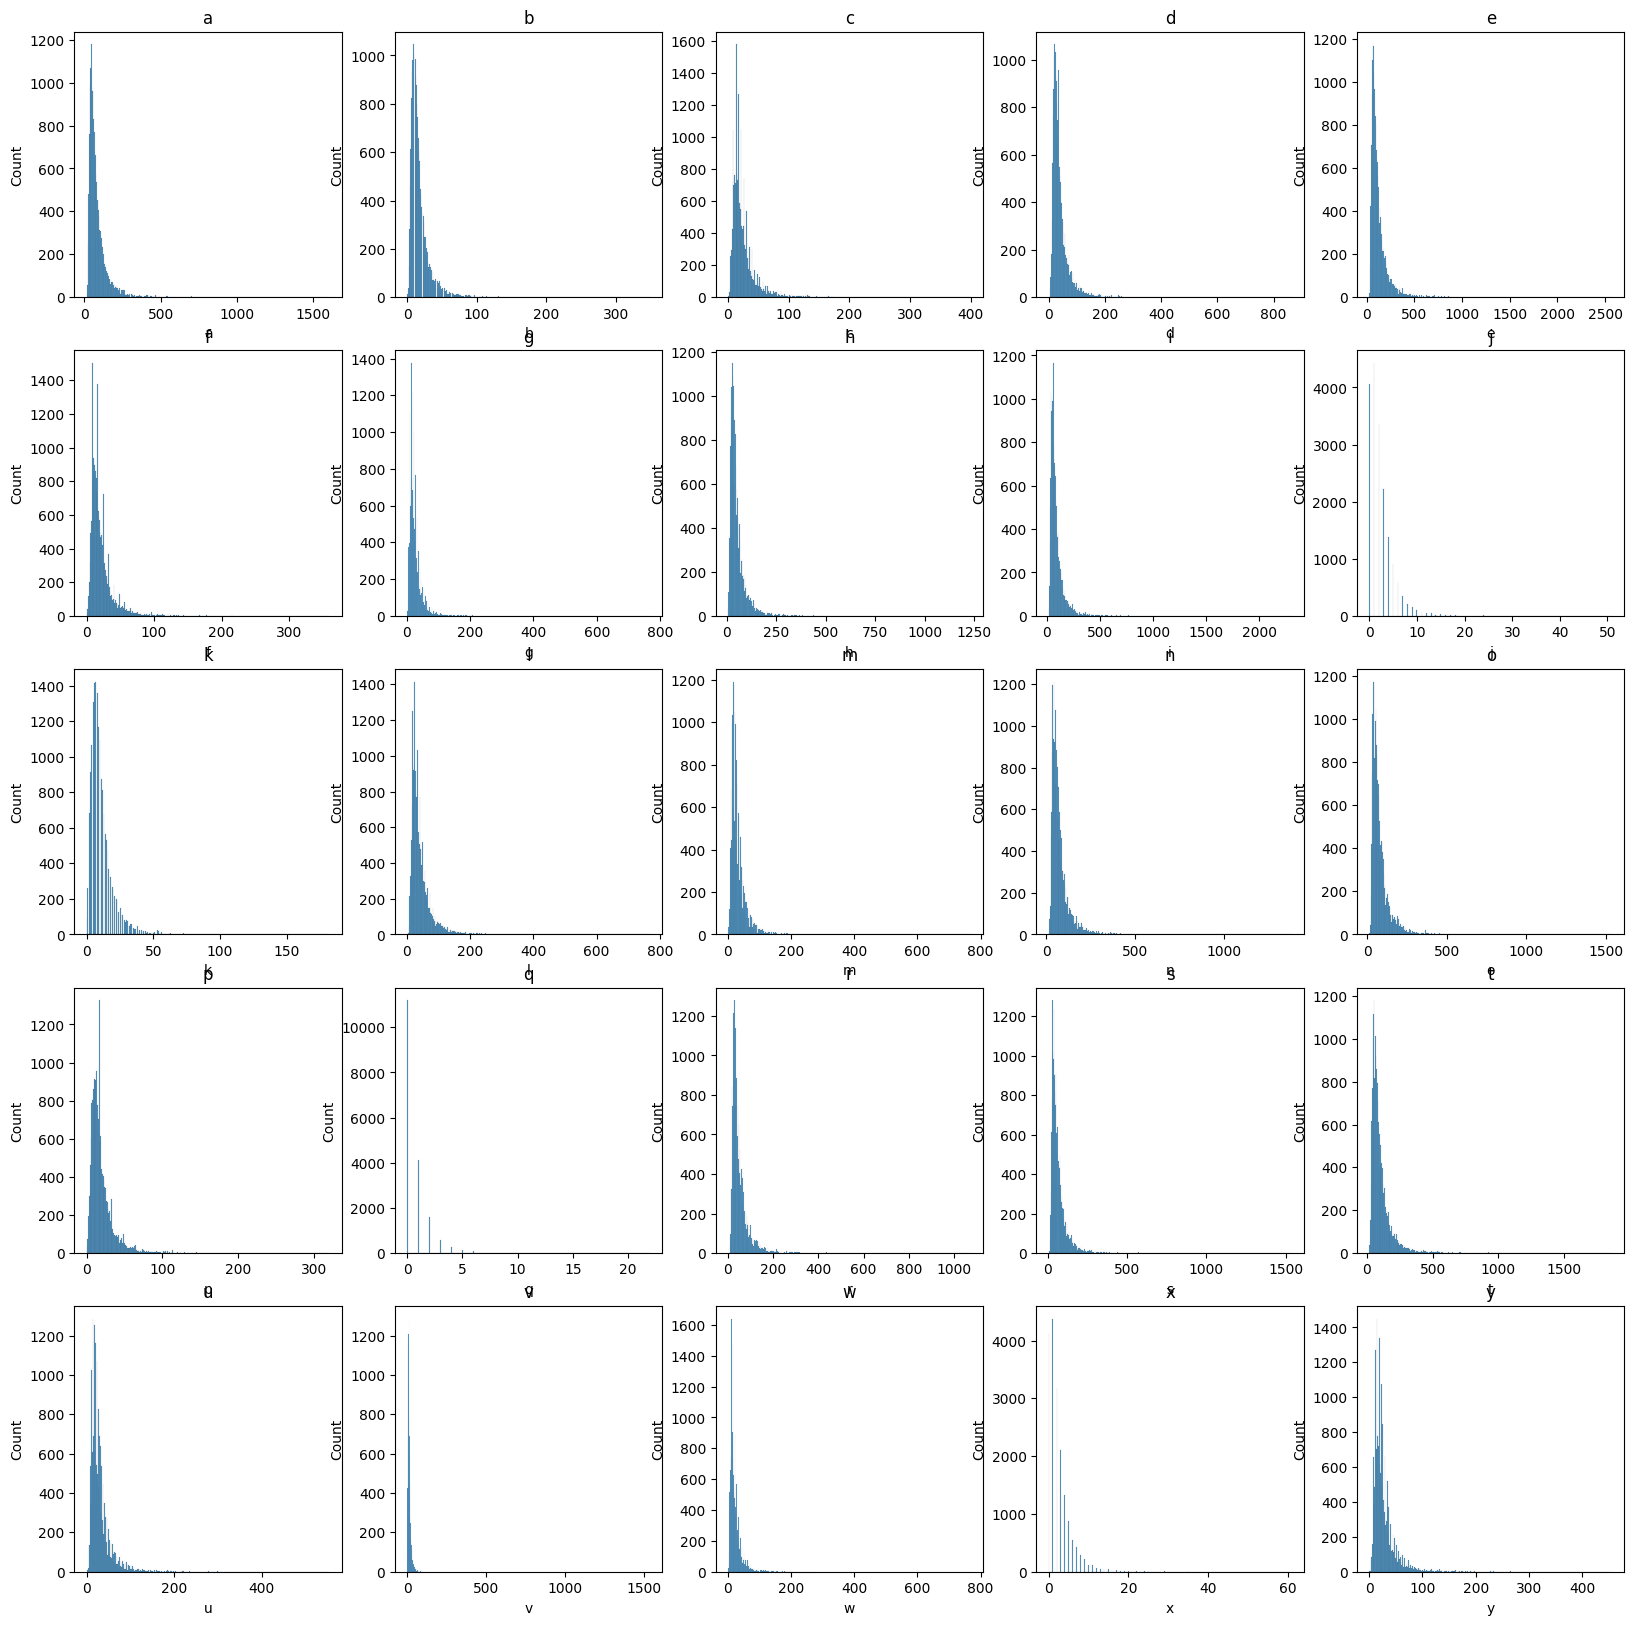

In [5]:
# make a figure plotting letters against number of occurances in selftext for each selftext
fig = plt.figure(figsize=(20, 20))
for i, letter in enumerate('abcdefghijklmnopqrstuvwxyz'):
    ax = fig.add_subplot(5, 5, i+1)
    sns.histplot(data=df, x=letter, ax=ax)
    ax.set_title(letter)
plt.show()


In [ ]:
# plot a-z on the y axis and the number of occurances on the x axis (no subplots)
active = False
if active:
    # create a df with each letter and the number of occurances
    letter_df = pd.DataFrame()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        # letter_df[letter] = df[letter] # add a column for each letter
        letter_df[letter] = df[letter].sum() # add a row for each letter

    # plot the df
    letter_df.T.plot(kind='bar', figsize=(20, 10))


        

In [ ]:
# create a word cloud of the selftext column that only uses words that appear more than 1000 times
from wordcloud import WordCloud
from tqdm import tqdm
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
if active:
    # create a df with each word and the number of occurances
    word_df = pd.DataFrame()



    for word in tqdm(df['selftext'].str.split().explode().unique()):
        word_df[word] = df['selftext'].str.contains(word).sum() # add a row for each word

    print(f'making word cloud')
    # create a word cloud
    wordcloud = WordCloud(width=1600, height=800, max_words=100, max_font_size=200, background_color='white').generate_from_frequencies(word_df.T[word_df.T[0] > 100][0])

    print(f'plotting word cloud')
    # plot the word cloud
    fig = plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show();

In [8]:
# calculate sentiment of selftext column and add it to the df
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
print(f'calculating sentiment')
df['sentiment'] = df['selftext'].apply(lambda x: analyzer.polarity_scores(x)['compound']) # add a column for sentiment
# add negative, neutral, and positive columns
try:
    df['negative'] = df['selftext'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
    df['neutral'] = df['selftext'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
    df['positive'] = df['selftext'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
except:
    pass

df.head()

# save the df
df.to_csv('../data/cleaned_reddit_withsentiment.csv', index=False)

calculating sentiment
